In [4]:
using DifferentialEquations

In [5]:
#Susceptible-exposed-infected-recovered model function
function seir_ode(dY,Y,p,t)
    #Infected per-Capita Rate
    β = p[1]
    #Incubation Rate
    σ = p[2]
    #Recover per-capita rate
    γ = p[3]
    #Death Rate
    μ = p[4]
    
    #Susceptible Individual
    S = Y[1]
    #Exposed Individual
    E = Y[2]
    #Infected Individual
    I = Y[3]
    #Recovered Individual
    #R = Y[4]
    
    dY[1] = μ-β*S*I-μ*S
    dY[2] = β*S*I-(σ+μ)*E
    dY[3] = σ*E - (γ+μ)*I
end

seir_ode (generic function with 1 method)

In [6]:
#Pram (Infected Rate, Incubation Rate, Recover Rate, Death Rate)
pram=[520/365,1/60,1/30,774835/(65640000*365)]
#Initialize Param(Susceptible Individuals, Exposed Individuals, Infected Individuals)
init=[0.8,0.1,0.1]
tspan=(0.0,365.0)

(0.0, 365.0)

In [7]:
seir_prob = ODEProblem(seir_ode,init,tspan,pram)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 365.0)
u0: [0.8, 0.1, 0.1]

In [8]:
sol=solve(seir_prob);

In [9]:
using Plots

In [10]:
va = VectorOfArray(sol.u)
y = convert(Array,va)
R = ones(size(sol.t))' - sum(y,dims=1);

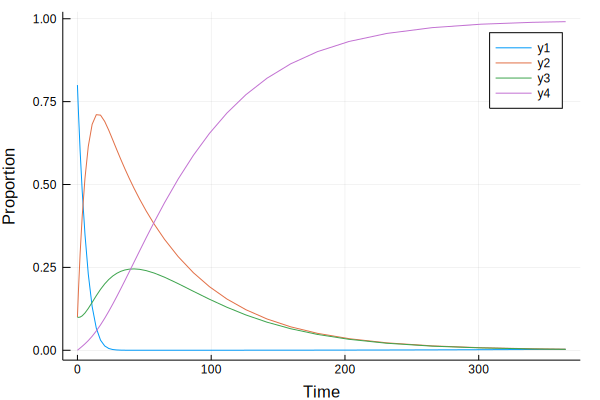

In [11]:
plot(sol.t,[y',R'],xlabel="Time",ylabel="Proportion")